In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')
len(df)

1000

In [ ]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

def plot_sentiment_histogram(df: pd.DataFrame, sentiment_col: str = 'sentiment_lexicon'):
    """
    Plots a histogram of the sentiment variable.

    Args:
        df: A pandas DataFrame with a sentiment column.
        sentiment_col: The name of the sentiment column (default is 'sentiment').
    """
    if sentiment_col not in df.columns:
        print(f"Error: Column '{sentiment_col}' not found in the DataFrame.")
        return

    # Convert sentiment column to numeric, coercing errors to NaN
    sentiment_data = pd.to_numeric(df[sentiment_col], errors='coerce').dropna()

    if sentiment_data.empty:
        print(f"No valid sentiment data available to plot histogram.")
        return

    fig, ax = plt.subplots(figsize=(10, 6))

    # Calculate percentages for the histogram
    weights = np.ones_like(sentiment_data) / len(sentiment_data)

    ax.hist(sentiment_data, bins=10, edgecolor='black', weights=weights) # Adjust bins as needed

    # Set x-axis ticks to unique sentiment values
    unique_sentiments = sorted(sentiment_data.unique())
    ax.set_xticks(unique_sentiments)

    ax.set_title('Distribution of Sentiment Scores', loc='left')
    ax.set_xlabel('Sentiment Score')
    ax.set_ylabel('Percentage (%)')
    # Remove the grid
    ax.grid(False)

    plt.tight_layout()
    plt.show()

def plot_sentiment_over_time(df: pd.DataFrame):
    """
    Plots the mean sentiment over time using the publish_date, aggregated by month.

    Args:
        df: A pandas DataFrame with 'publish_date' and 'sentiment' columns.
    """
    # Convert 'publish_date' to datetime objects
    df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

    # Convert 'sentiment' to numeric, coercing errors to NaN
    df['sentiment_lexicon'] = pd.to_numeric(df['sentiment_lexicon'], errors='coerce')

    # Drop rows with invalid dates or missing sentiment
    df_cleaned = df.dropna(subset=['publish_date', 'sentiment_lexicon'])

    # Group by month and calculate the mean sentiment
    sentiment_over_time_monthly = df_cleaned.groupby(df_cleaned['publish_date'].dt.to_period('M'))['sentiment_lexicon'].mean()

    # Convert the PeriodIndex to datetime for plotting
    sentiment_over_time_monthly.index = sentiment_over_time_monthly.index.to_timestamp()

    # Create the plot
    fig, ax = plt.subplots(figsize=(18, 6))
    sentiment_over_time_monthly.plot(ax=ax, marker='o', linestyle='-')

    # Add labels, title, and grid
    ax.set_ylabel('Mean Sentiment')
    ax.set_title('Mean Sentiment Over Time (Monthly)')
    ax.set_xlabel('Date')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.5 MB/s eta 0:00:00


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

print(df.sentiment_lexicon.value_counts())

sentiment_lexicon
 5    726
-5    121
 4     49
 3     30
-4     24
-3     15
 2     11
-1      7
-2      6
 0      6
 1      5
Name: count, dtype: int64


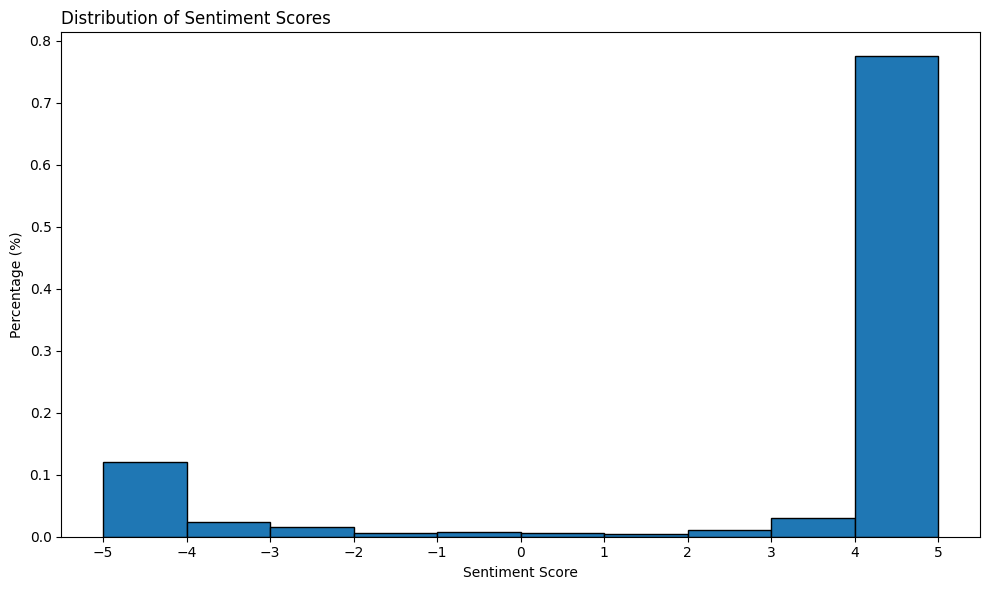

None


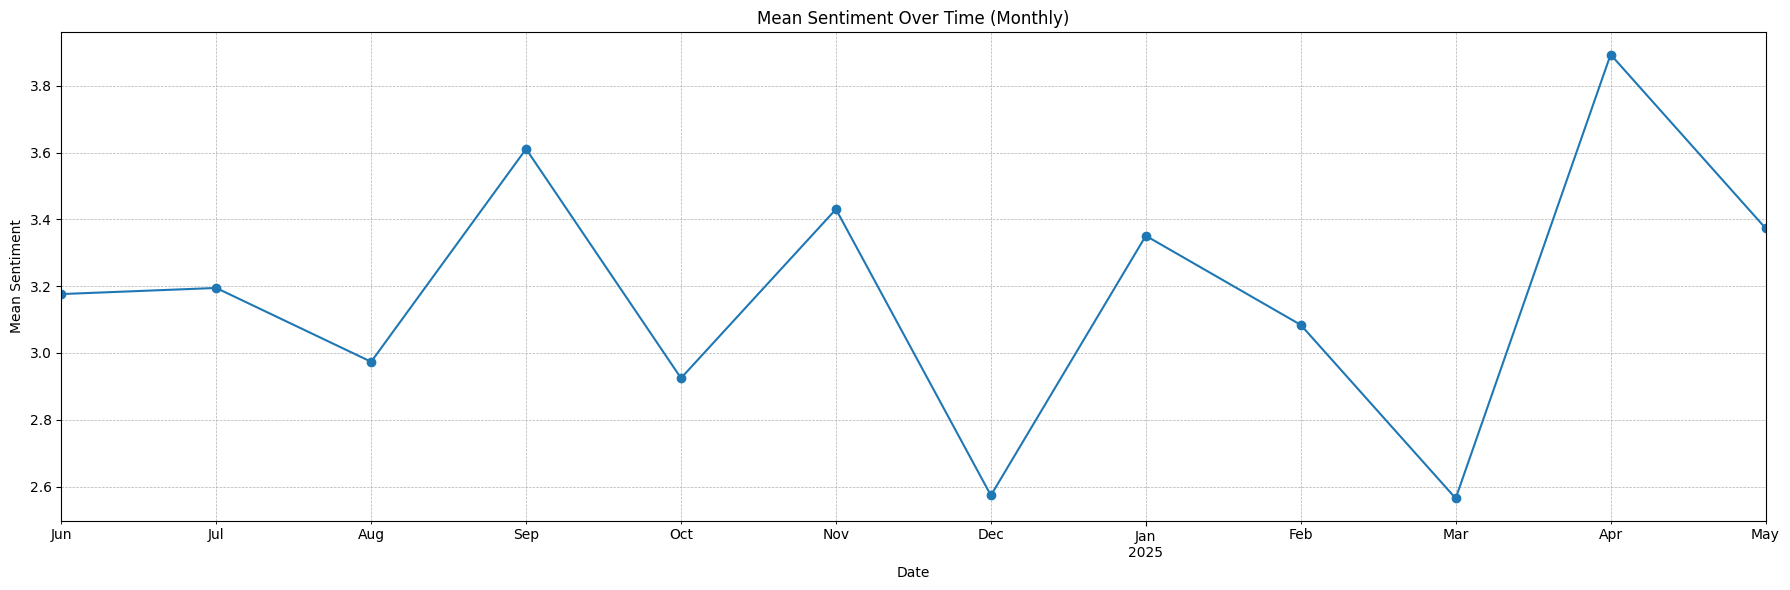

None


In [ ]:
print(plot_sentiment_histogram(df))
print(plot_sentiment_over_time(df))

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

print(df.sentiment_lexicon.value_counts())

sentiment_lexicon
 5    335
 4    262
 3    133
 2    113
 0     96
 1     32
-3      7
-4      7
-2      7
-1      6
-5      2
Name: count, dtype: int64


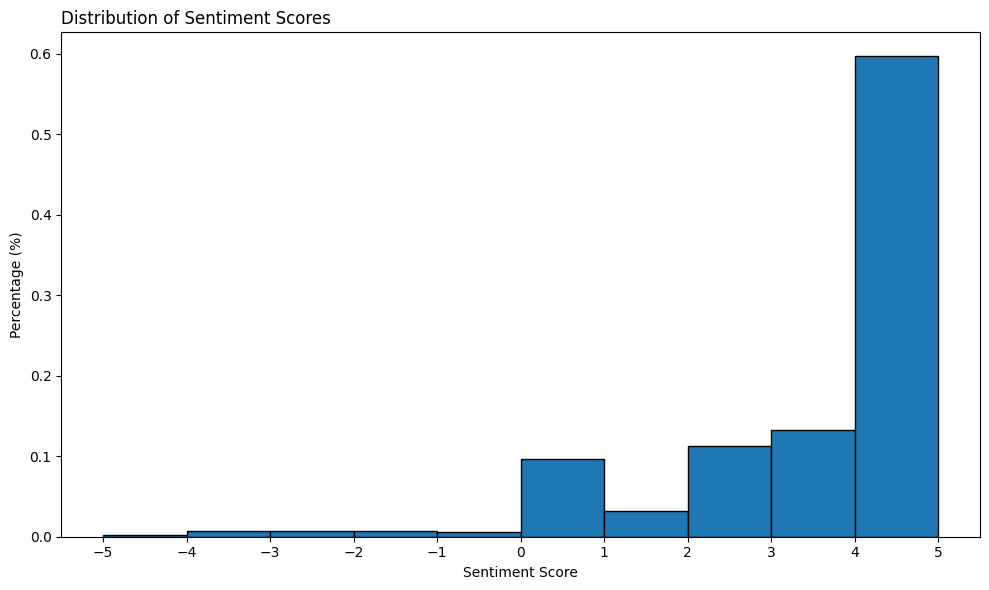

None


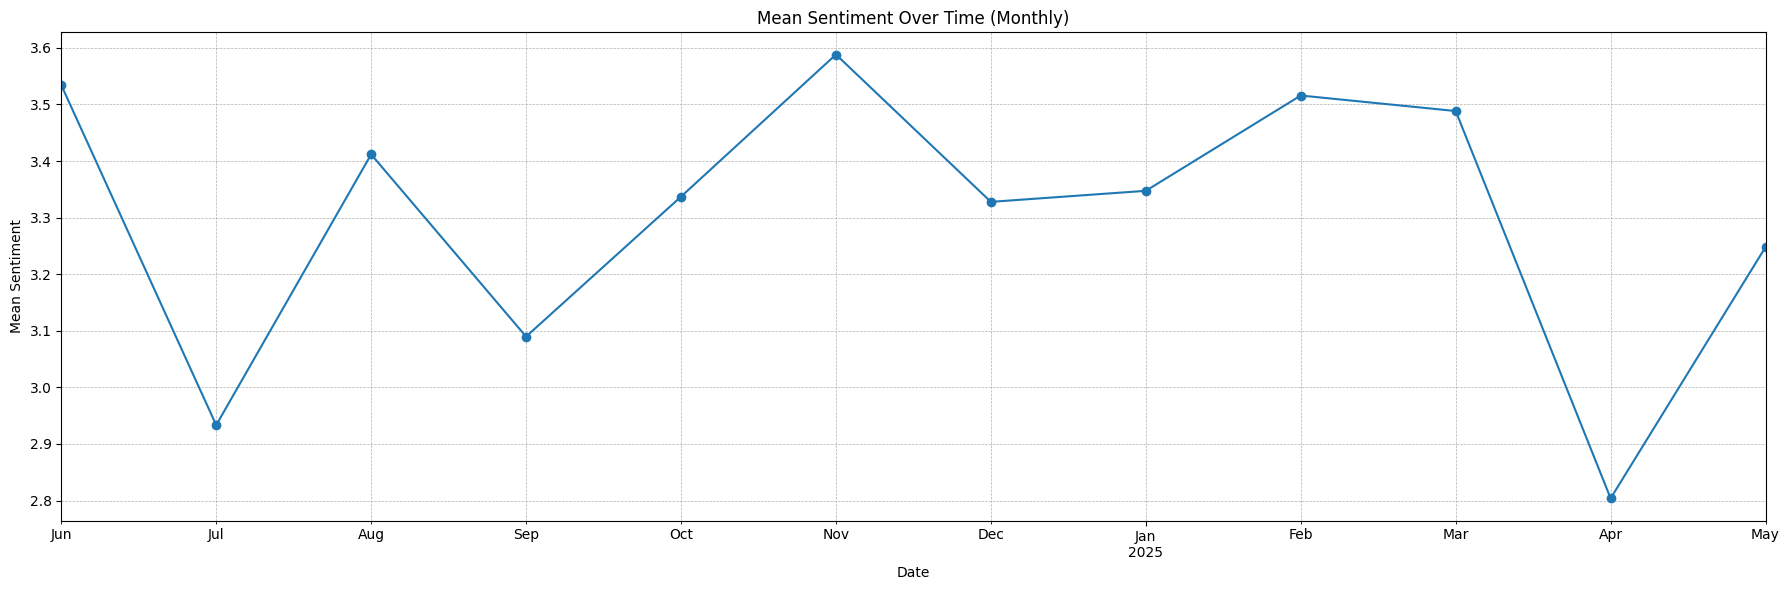

None


In [ ]:
print(plot_sentiment_histogram(df))
print(plot_sentiment_over_time(df))

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

print(df.sentiment_lexicon.value_counts())

sentiment_lexicon
-5    905
-4     38
-3     25
 0     24
 2      3
 1      2
-2      2
 5      1
Name: count, dtype: int64


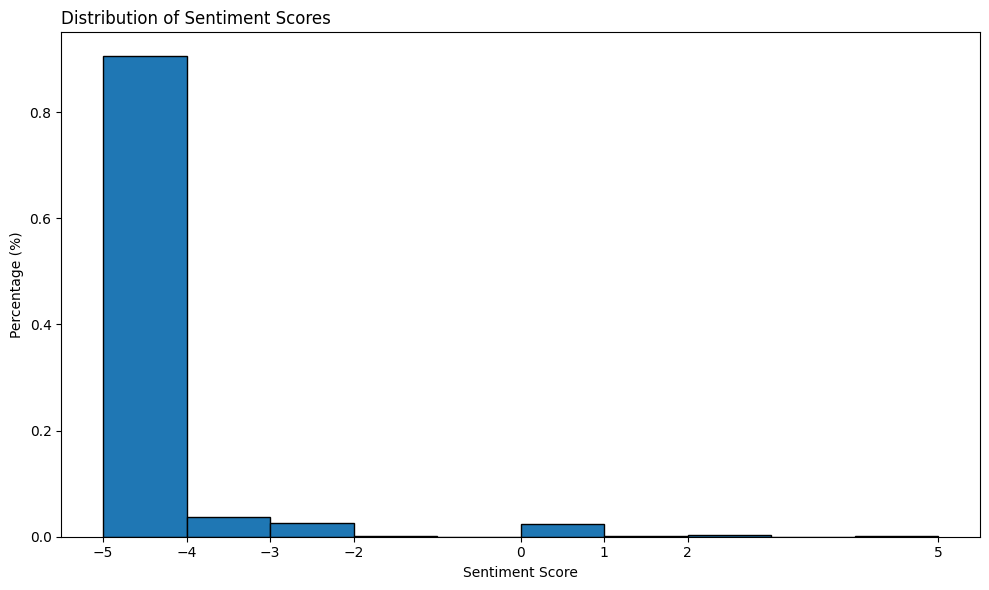

None


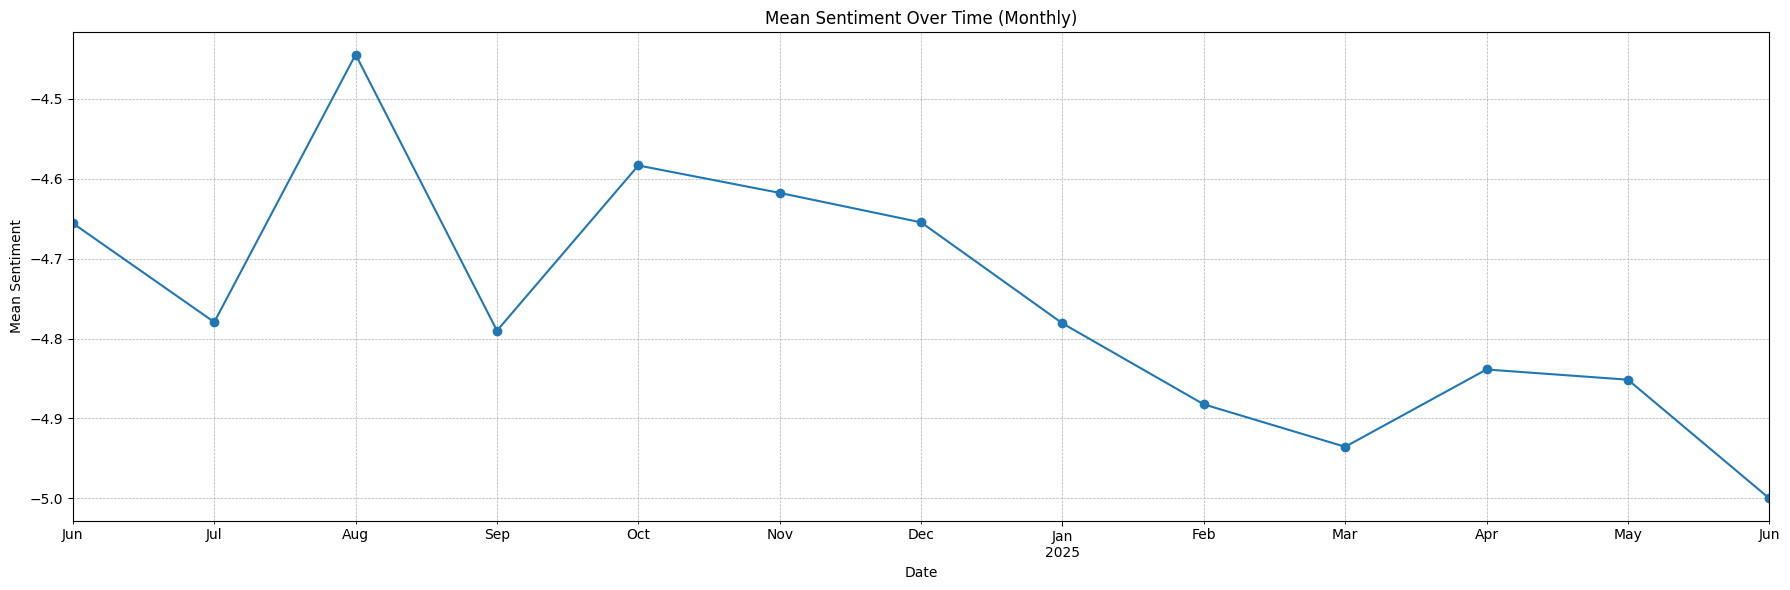

None


In [ ]:
print(plot_sentiment_histogram(df))
print(plot_sentiment_over_time(df))

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

print(df.sentiment_lexicon.value_counts())

sentiment_lexicon
-4    237
-5    230
-3    178
 4    123
-1     82
 0     42
-2     37
 2     22
 1     20
 5     16
 3     13
Name: count, dtype: int64


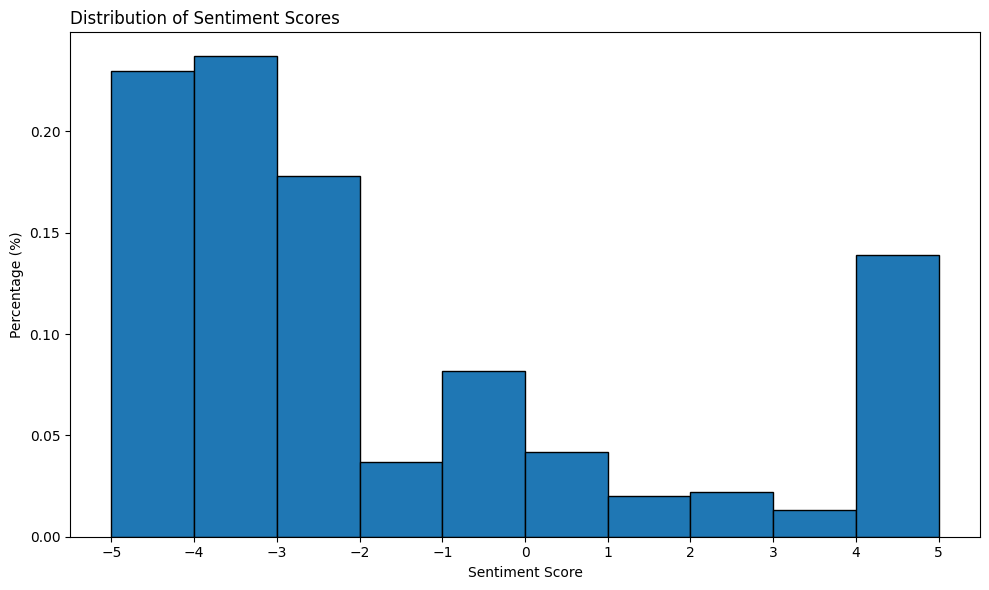

None


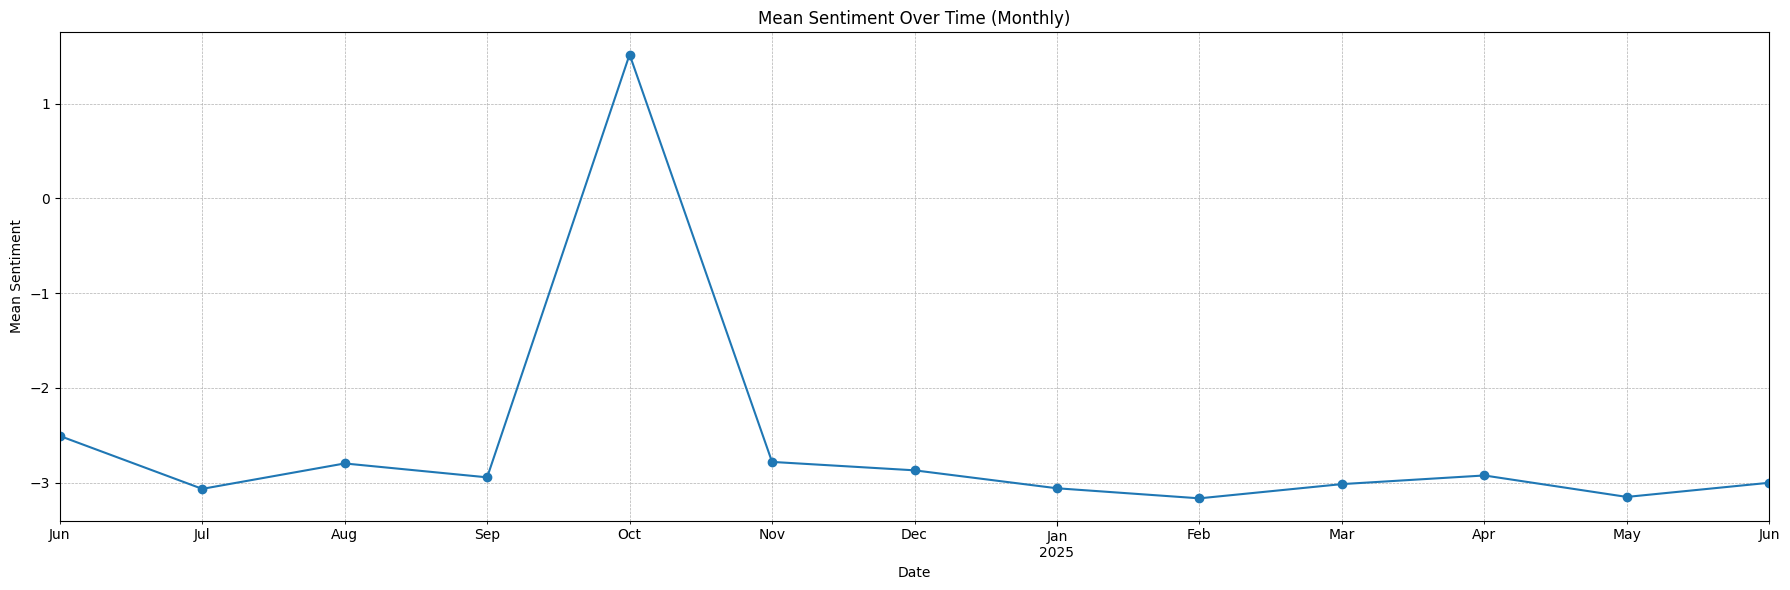

None


In [ ]:
print(plot_sentiment_histogram(df))
print(plot_sentiment_over_time(df))

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

print(df.sentiment_lexicon.value_counts())

sentiment_lexicon
 5    783
-5     69
 4     49
-4     30
 3     16
 2     11
 1     10
-3      9
-1      9
 0      7
-2      7
Name: count, dtype: int64


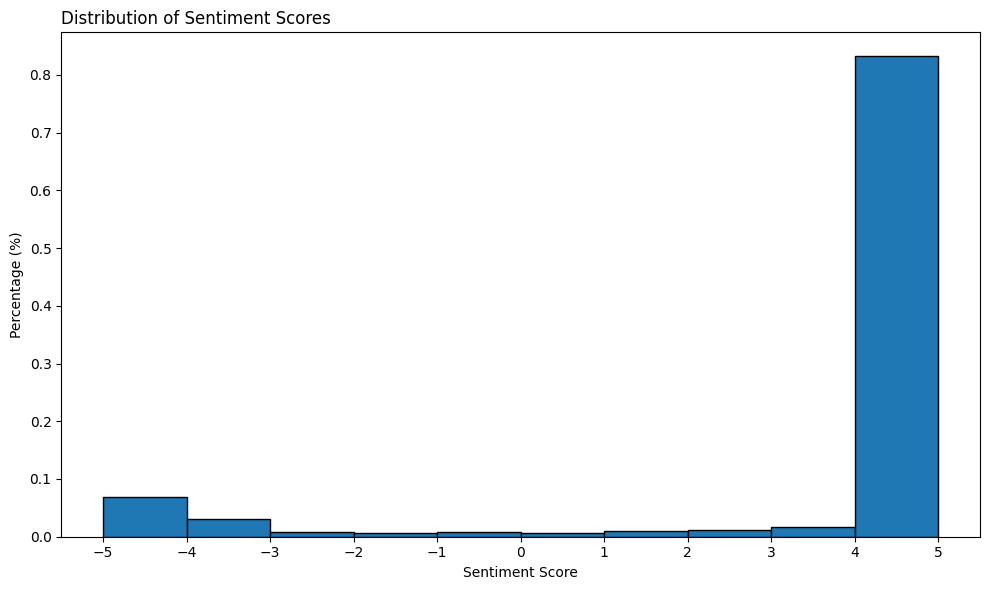

None


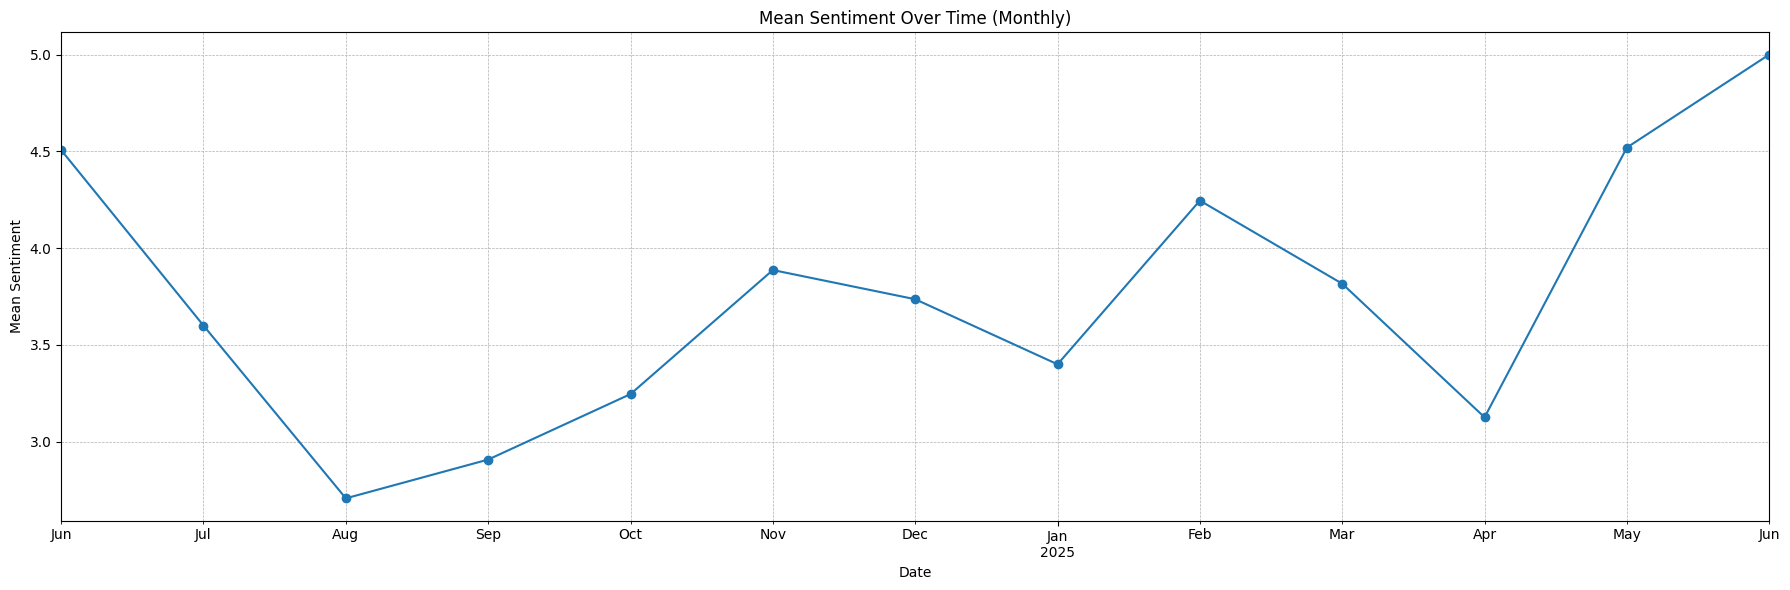

None


In [ ]:
print(plot_sentiment_histogram(df))
print(plot_sentiment_over_time(df))

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

print(df.sentiment_lexicon.value_counts())

sentiment_lexicon
 4    269
 5    214
 3    125
 2    112
 0     50
 1     44
-4     44
-3     42
-5     35
-2     35
-1     30
Name: count, dtype: int64


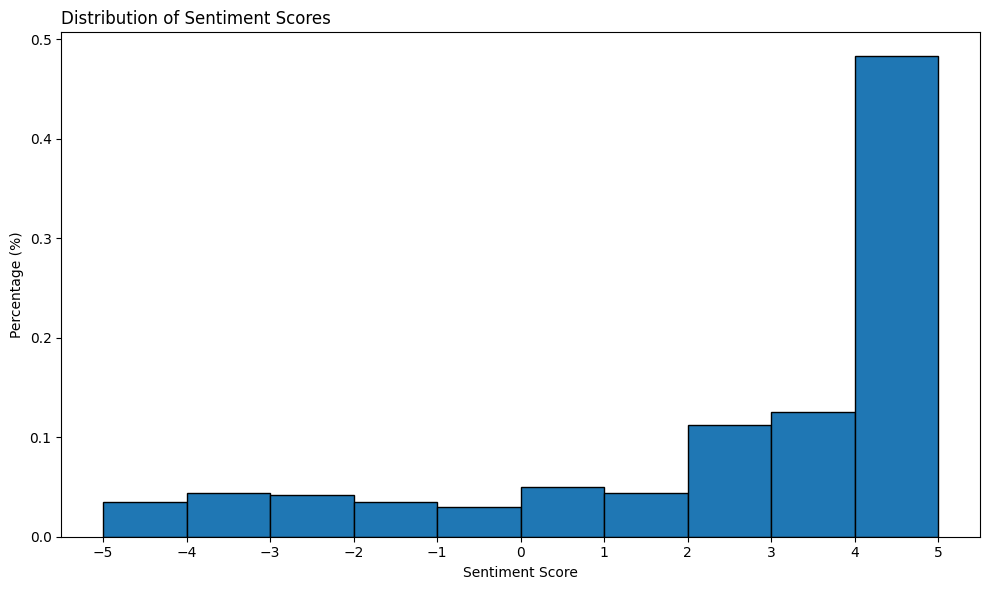

None


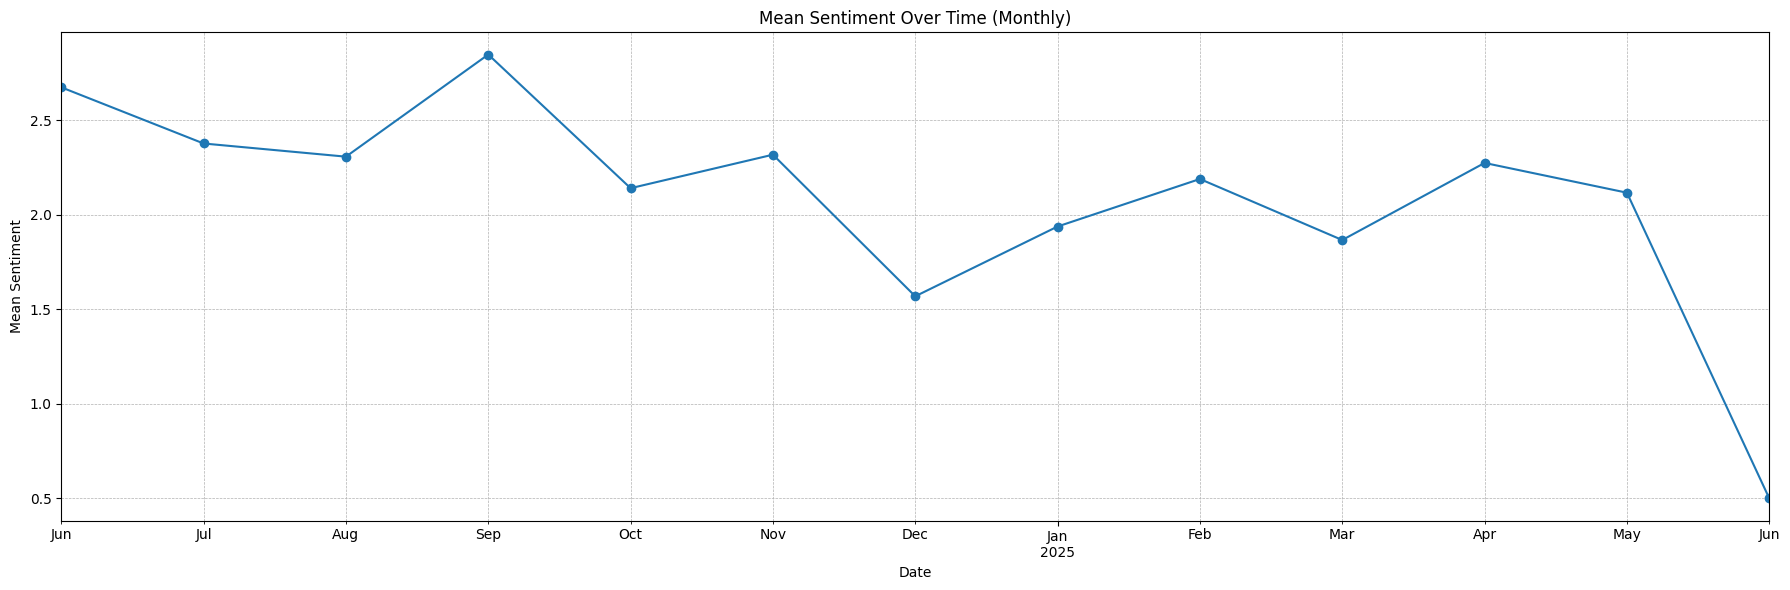

None


In [ ]:
print(plot_sentiment_histogram(df))
print(plot_sentiment_over_time(df))

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

print(df.sentiment_lexicon.value_counts())

sentiment_lexicon
 5    818
 4     61
-5     54
-4     11
 3     10
 2      9
-3      9
 1      8
 0      7
-1      7
-2      6
Name: count, dtype: int64


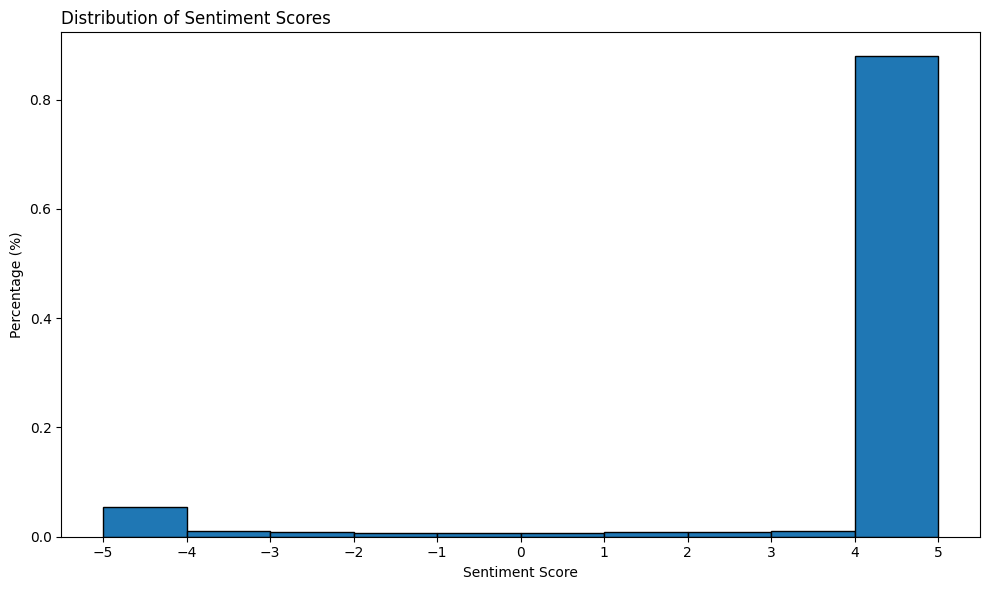

None


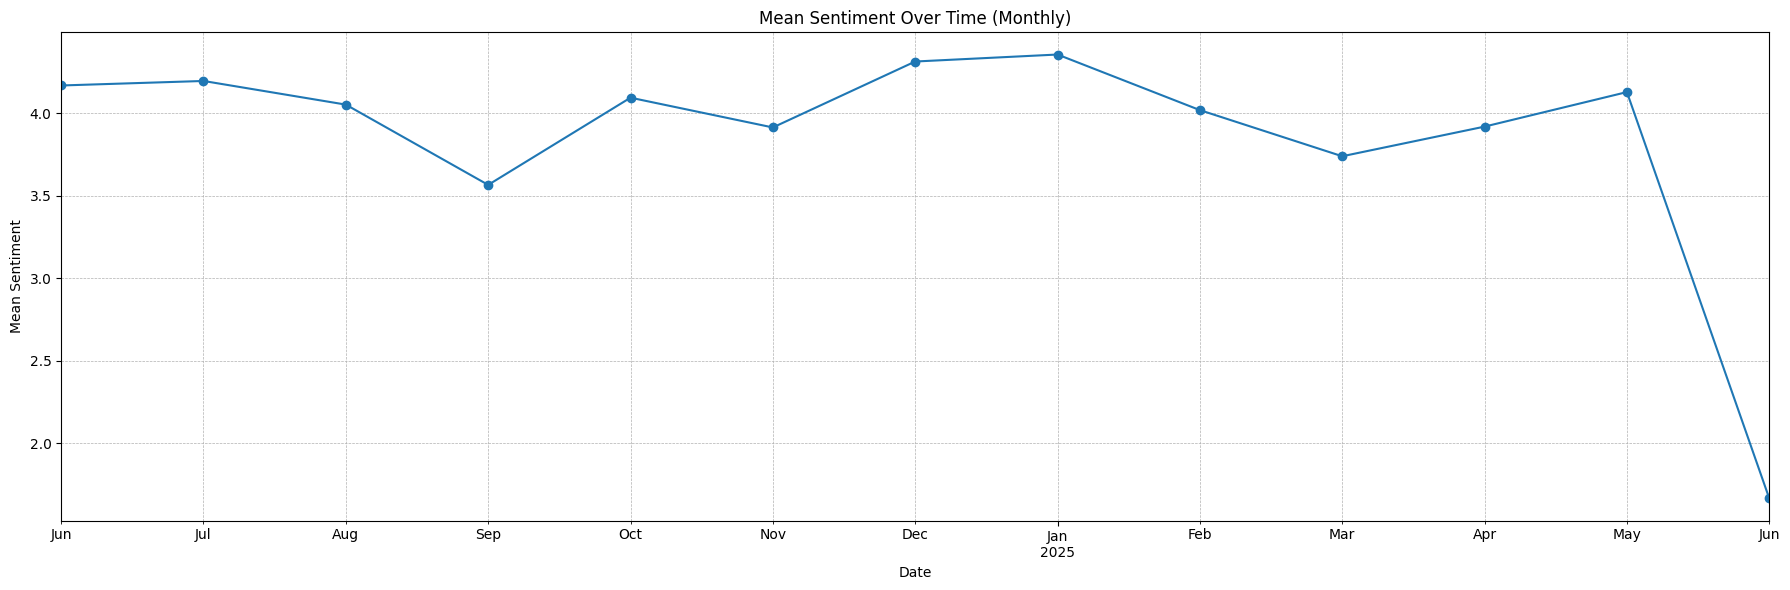

None


In [ ]:
print(plot_sentiment_histogram(df))
print(plot_sentiment_over_time(df))

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

print(df.sentiment_lexicon.value_counts())

sentiment_lexicon
0    909
Name: count, dtype: int64


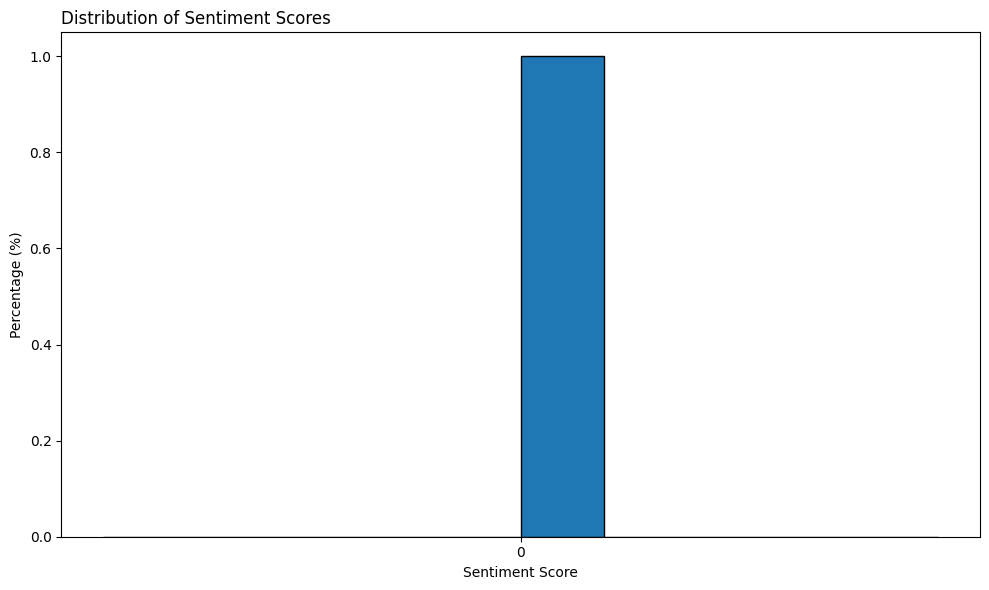

None


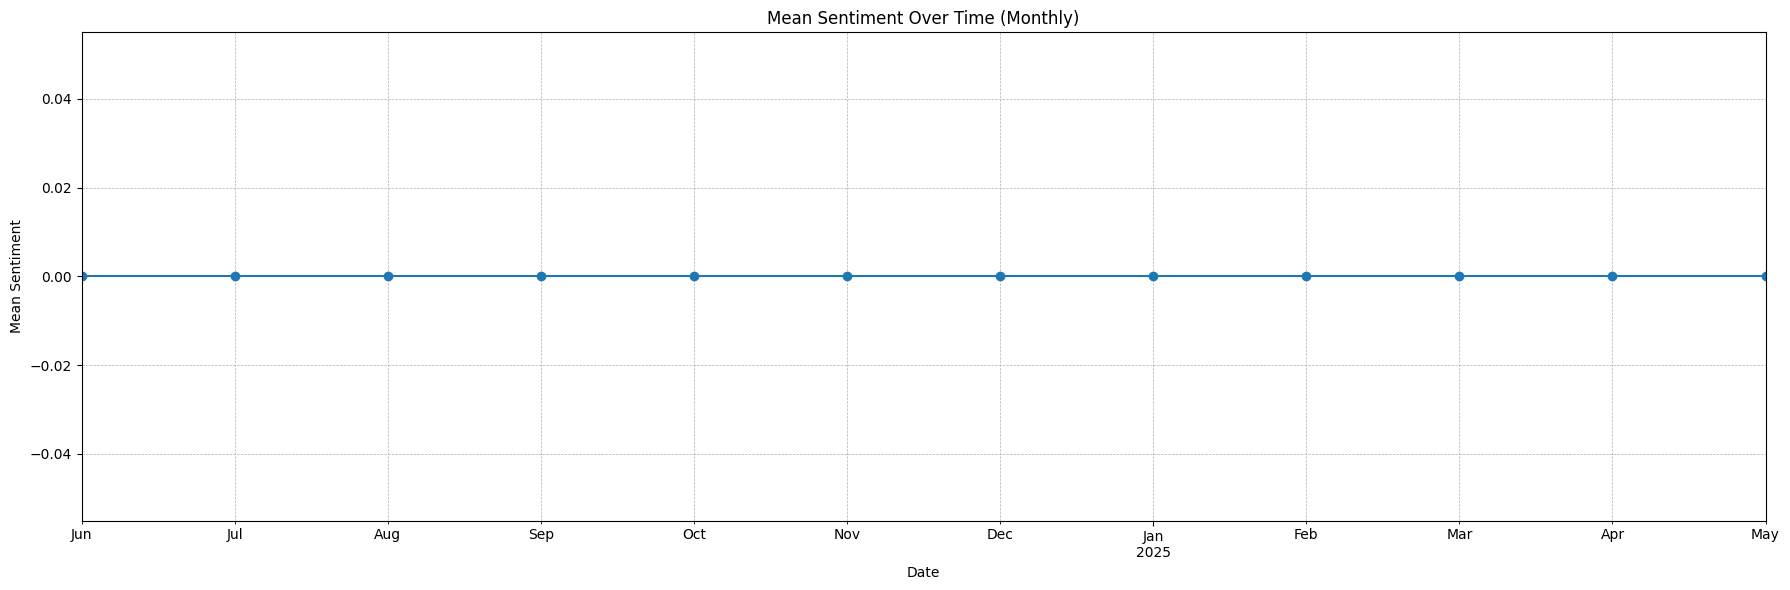

None


In [ ]:
print(plot_sentiment_histogram(df))
print(plot_sentiment_over_time(df))

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

print(df.sentiment_lexicon.value_counts())

sentiment_lexicon
 0    777
 2     69
 3     46
 4     35
 1     18
 5     18
-3     17
-1      8
-2      6
-5      3
-4      3
Name: count, dtype: int64


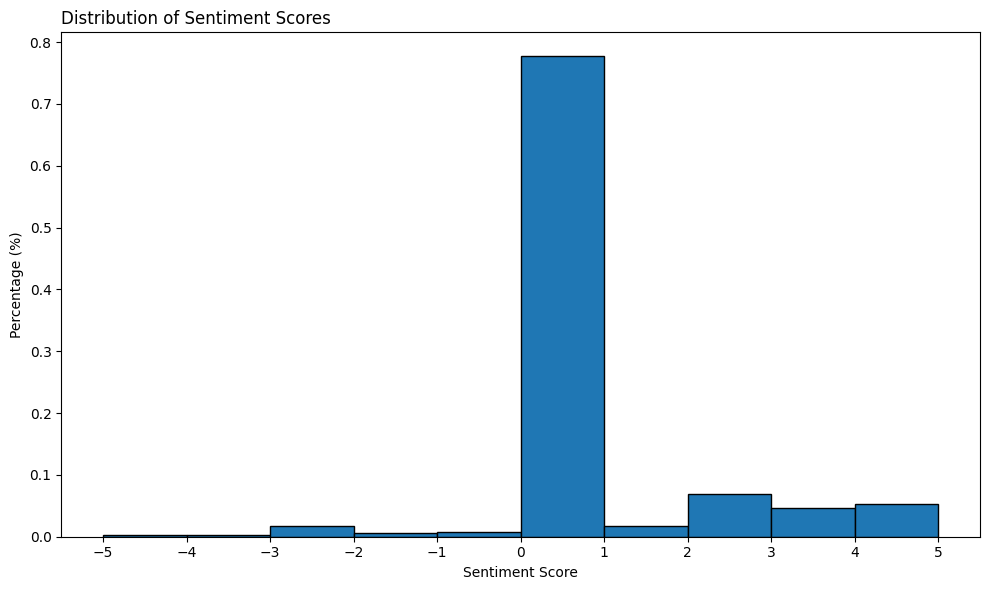

None


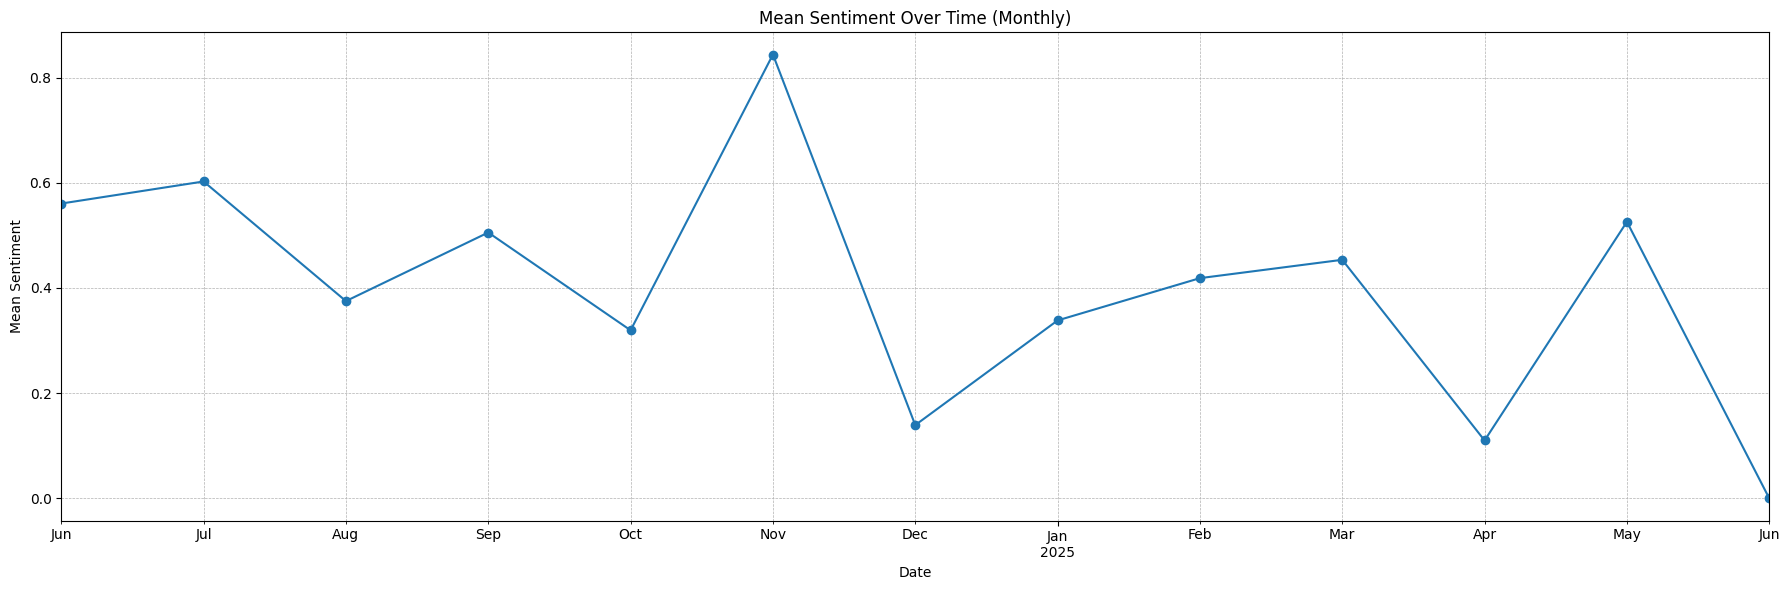

None


In [ ]:
print(plot_sentiment_histogram(df))
print(plot_sentiment_over_time(df))

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

print(df.sentiment_lexicon.value_counts())

sentiment_lexicon
 0    846
 4     73
 2     30
 3     23
 5      9
 1      6
-2      5
-1      4
-3      3
-4      1
Name: count, dtype: int64


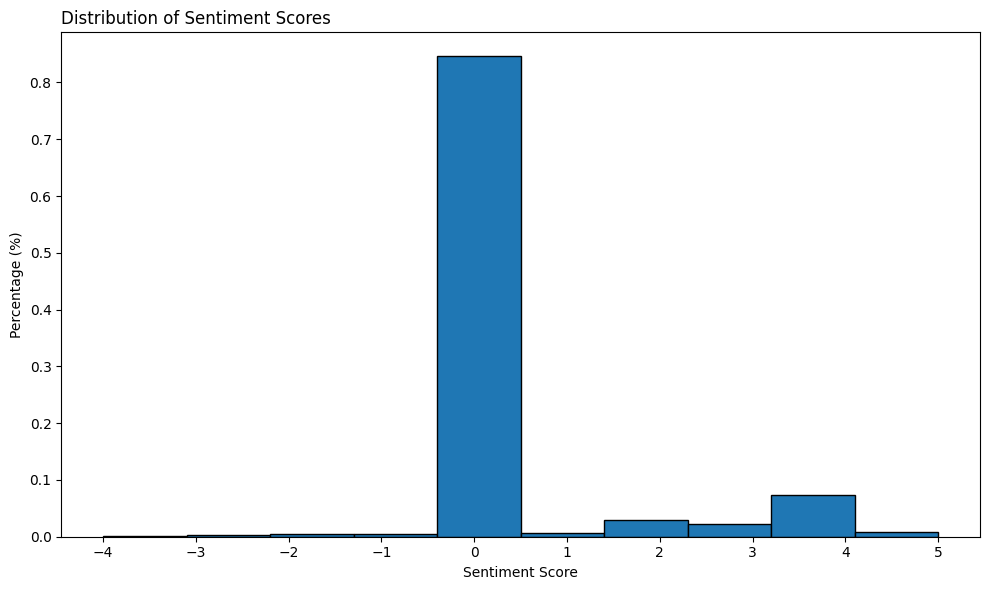

None


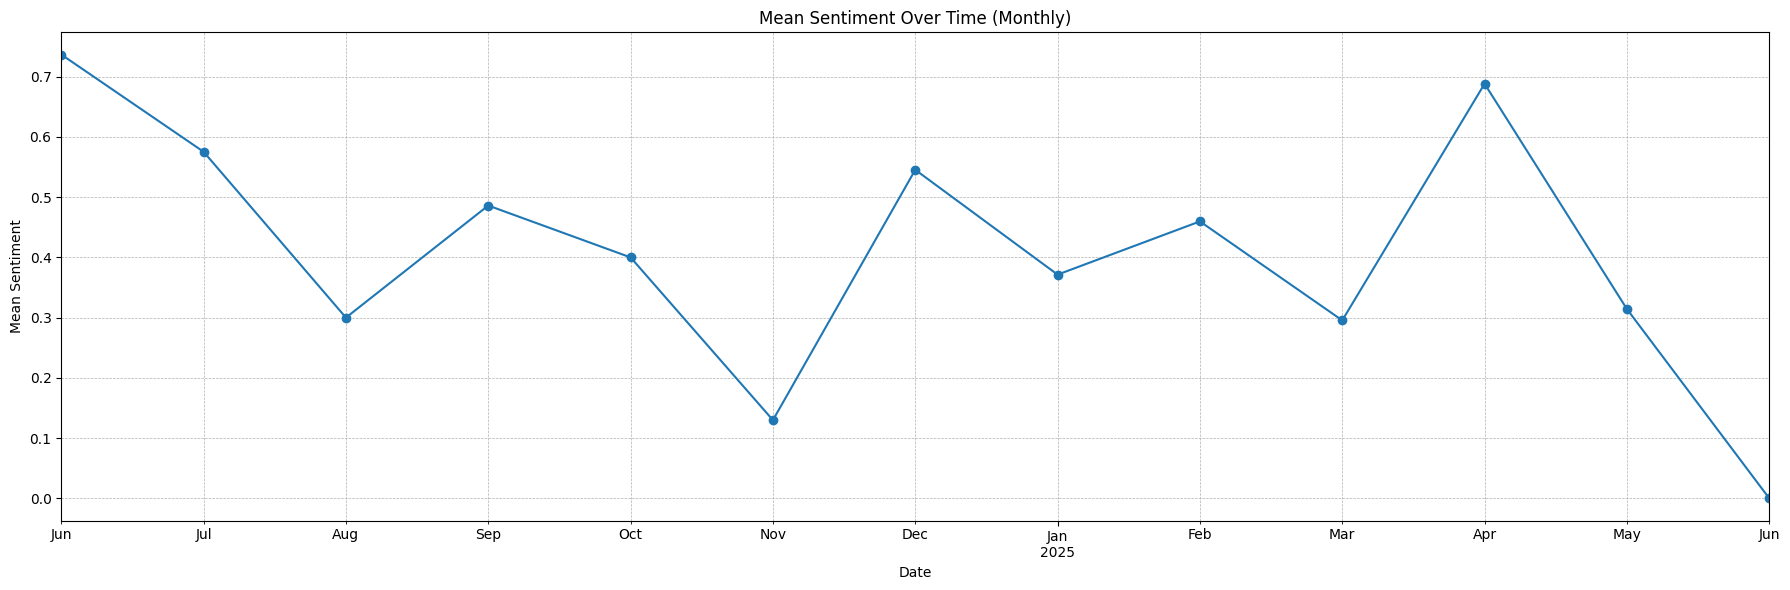

None


In [ ]:
print(plot_sentiment_histogram(df))
print(plot_sentiment_over_time(df))

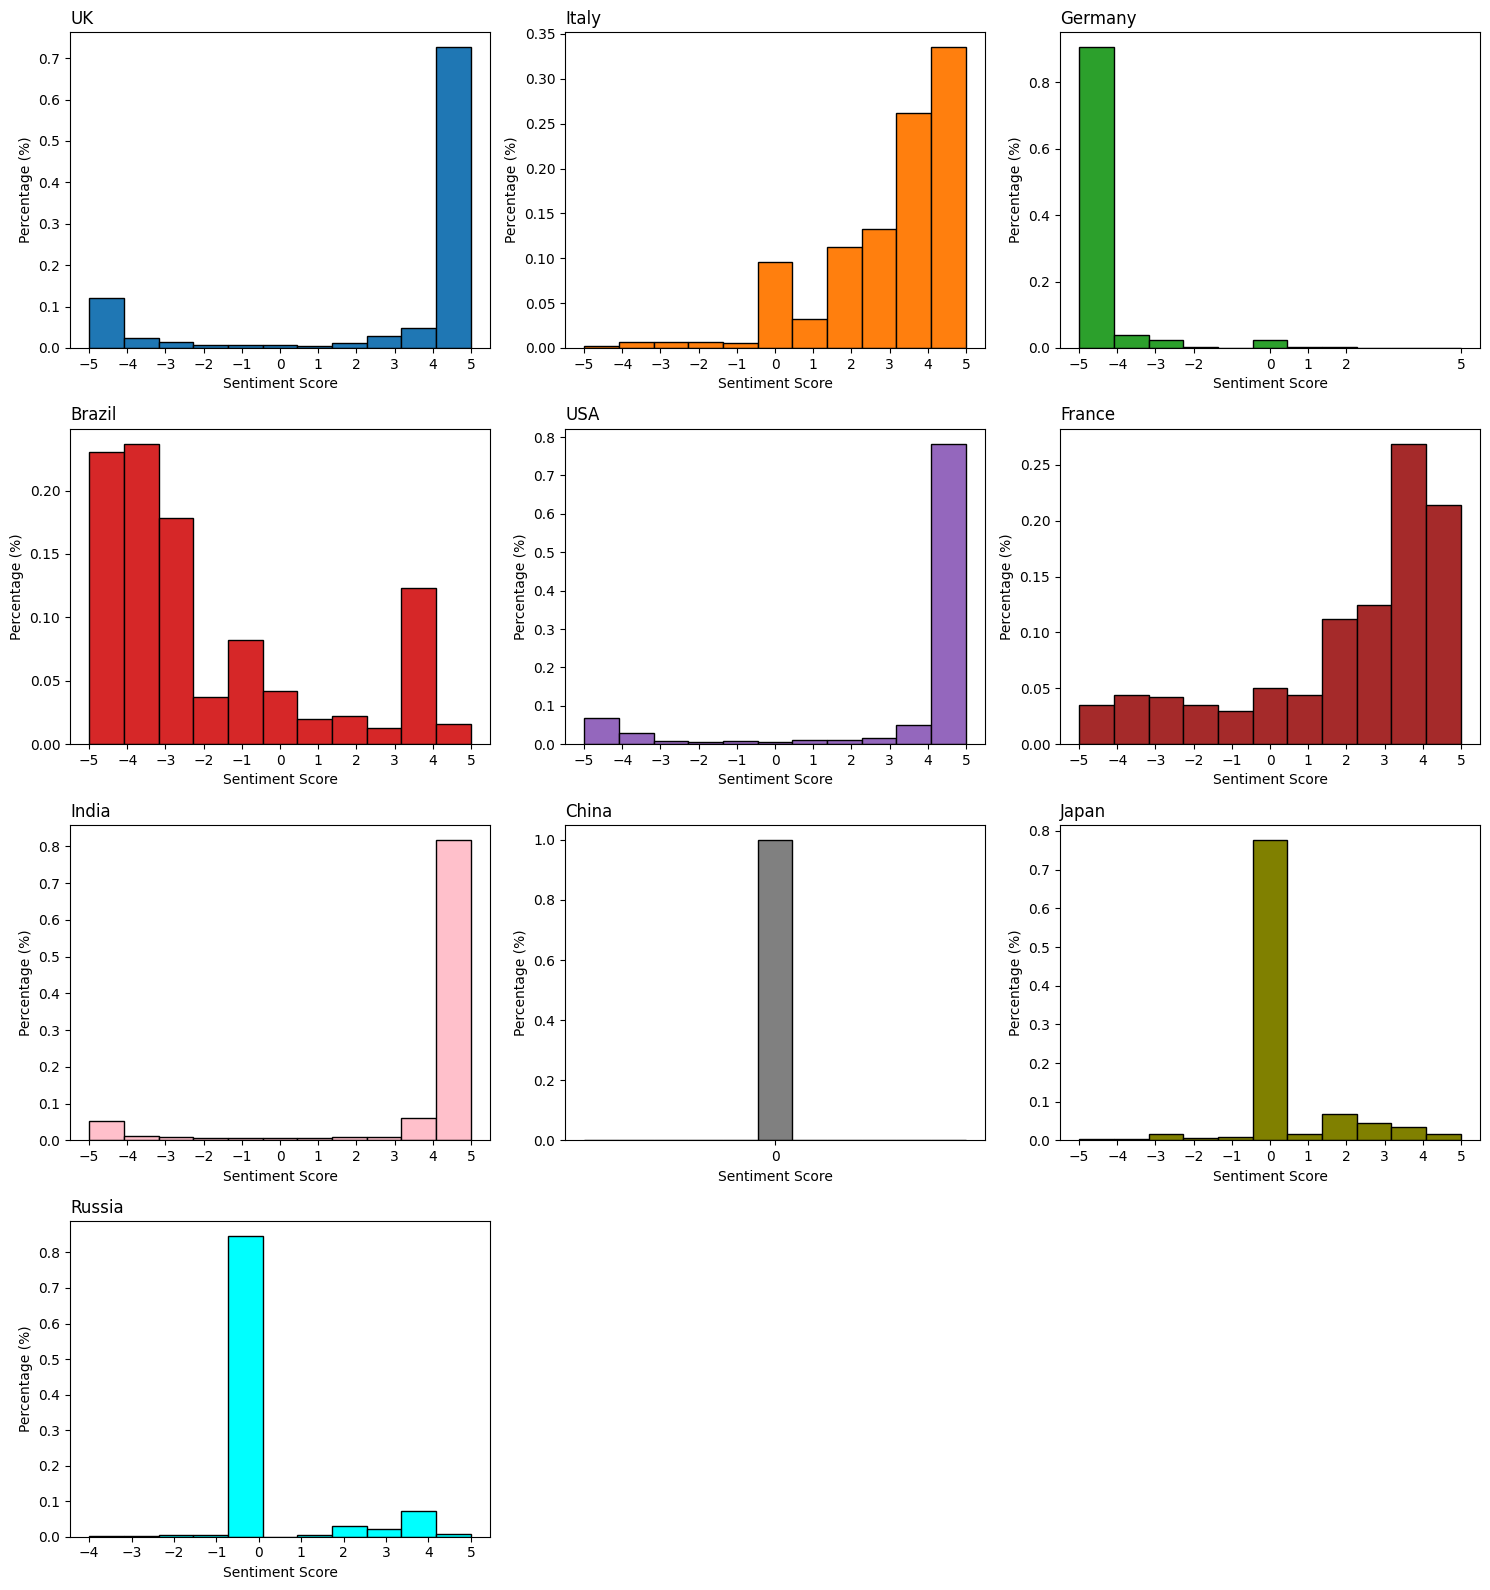

In [ ]:
def plot_sentiment_lexicon_histograms_by_country(country_dfs, country_names, colors=None):
    """
    Plots histograms of the sentiment variable for different countries in subplots.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country.
        country_names: A list of strings, the names of the countries.
        colors: A list of colors for each country's bars (optional).
    """
    n_countries = len(country_dfs)
    n_cols = 3  # You can adjust the number of columns for subplots
    n_rows = (n_countries + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    for i, df in enumerate(country_dfs):
        ax = axes[i]
        country_name = country_names[i]

        # Convert sentiment column to numeric, coercing errors to NaN
        sentiment_data = pd.to_numeric(df['sentiment_lexicon'], errors='coerce').dropna()

        if not sentiment_data.empty:
            # Calculate percentages for the histogram
            weights = np.ones_like(sentiment_data) / len(sentiment_data)

            color = colors[i] if colors and i < len(colors) else None
            ax.hist(sentiment_data, bins=11, edgecolor='black', weights=weights, color=color) # Adjust bins as needed

            # Set x-axis ticks to unique sentiment values
            unique_sentiments = sorted(sentiment_data.unique())
            ax.set_xticks(unique_sentiments)

            ax.set_title(f'{country_name}', loc='left')
            ax.set_xlabel('Sentiment Score')
            ax.set_ylabel('Percentage (%)')
            ax.grid(False)
        else:
            ax.set_title(f'{country_name} - No data available', loc='left')
            ax.set_visible(True) # Ensure the empty subplot is still displayed


    # Hide any unused subplots
    for j in range(n_countries, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

country_dfs = [
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
]

country_names = ['UK', 'Italy', 'Germany', 'Brazil', 'USA', 'France', 'India', 'China', 'Japan', 'Russia']

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
for df in country_dfs:
  df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

country_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

plot_sentiment_lexicon_histograms_by_country(country_dfs, country_names, country_colors)

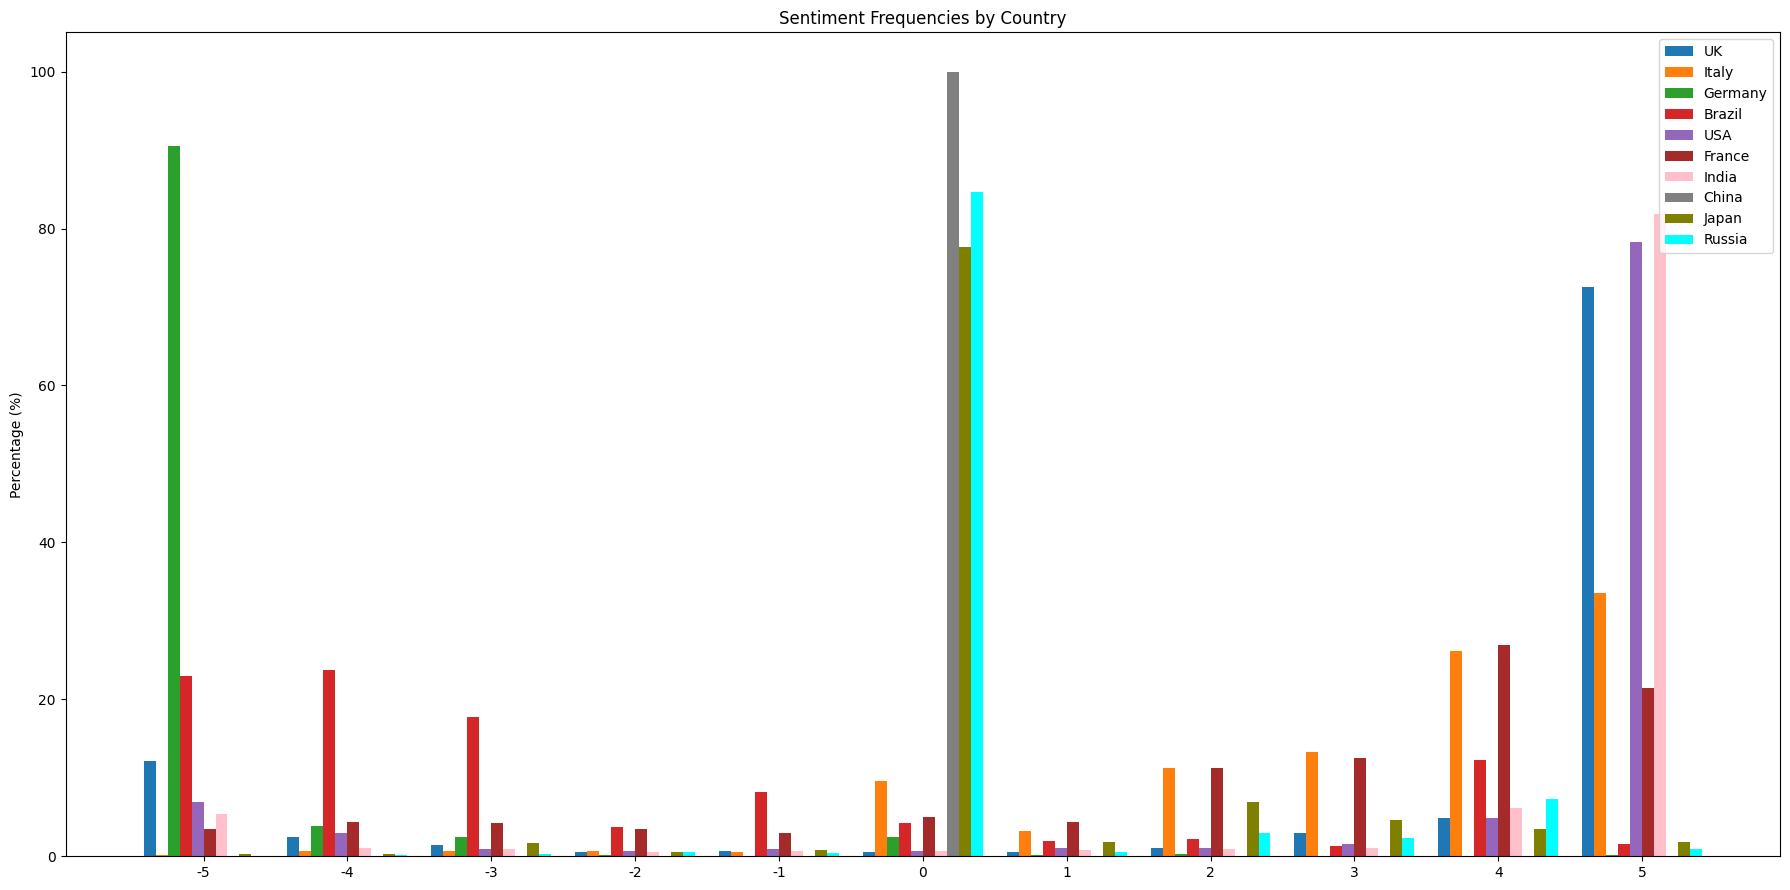

In [ ]:
#Can you modify plot_sentiment_lexicon_frequencies_by_country so that there is a gap between the series of bars belonging to the same value and the series of bars
#belonging to the next value? In the concrete, I want a gap between the bar of the last country in a given value, for example Russia in 4, and the bar that
#starts in the new value, for example UK in 5.

def plot_sentiment_lexicon_frequencies_by_country(country_dfs, country_names, colors=None):
    """
    Plots the sentiment frequencies of different countries side-by-side for comparison.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country.
        country_names: A list of strings, the names of the countries.
        colors: A list of colors for each country's bars (optional).
    """
    processed_dfs = []
    for df in country_dfs:
        # Convert sentiment column to numeric and drop NaNs within the function
        df['sentiment_lexicon'] = pd.to_numeric(df['sentiment_lexicon'], errors='coerce')
        processed_dfs.append(df.dropna(subset=['sentiment_lexicon']))

    # Get the unique sentiments from all dataframes
    all_sentiments = set()
    for df in processed_dfs:
        all_sentiments.update(df['sentiment_lexicon'].unique())

    # Sort the sentiments
    all_sentiments = sorted(list(all_sentiments))

    # Create a dictionary to store the sentiment percentages for each country
    sentiment_percentages = {sentiment: [] for sentiment in all_sentiments}

    # Populate the dictionary with the sentiment percentages
    for df in processed_dfs:
        total_count = df.shape[0]
        for sentiment in all_sentiments:
            count = df[df['sentiment_lexicon'] == sentiment].shape[0]
            percentage = (count / total_count) * 100 if total_count > 0 else 0
            sentiment_percentages[sentiment].append(percentage)

    # Create the plot
    fig, ax = plt.subplots(figsize=(18, 9))
    x = np.arange(len(all_sentiments))
    width = 0.1
    gap = 0.2 # Define the gap between groups of bars

    # Plot the bars for each country
    for i, country_name in enumerate(country_names):
        percentages = [sentiment_percentages[sentiment][i] for sentiment in all_sentiments]
        color = colors[i] if colors and i < len(colors) else None
        # Adjust the x-position to include the gap
        ax.bar(x + i * width + x * gap, percentages, width, label=country_name, color=color)

    # Add labels, title, and legend
    ax.set_ylabel('Percentage (%)')
    ax.set_title('Sentiment Frequencies by Country')
    # Adjust the x-ticks position to be in the center of each group
    ax.set_xticks(x + ((len(country_names) - 1) * width) / 2 + x * gap)
    ax.set_xticklabels(all_sentiments)
    ax.legend()

    plt.tight_layout()
    plt.show()


# List of dataframes and country names
country_dfs = [
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
]

country_names = ['UK', 'Italy', 'Germany', 'Brazil', 'USA', 'France', 'India', 'China', 'Japan', 'Russia']

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
for df in country_dfs:
  df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

country_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot the sentiment frequencies
plot_sentiment_lexicon_frequencies_by_country(country_dfs, country_names, country_colors)

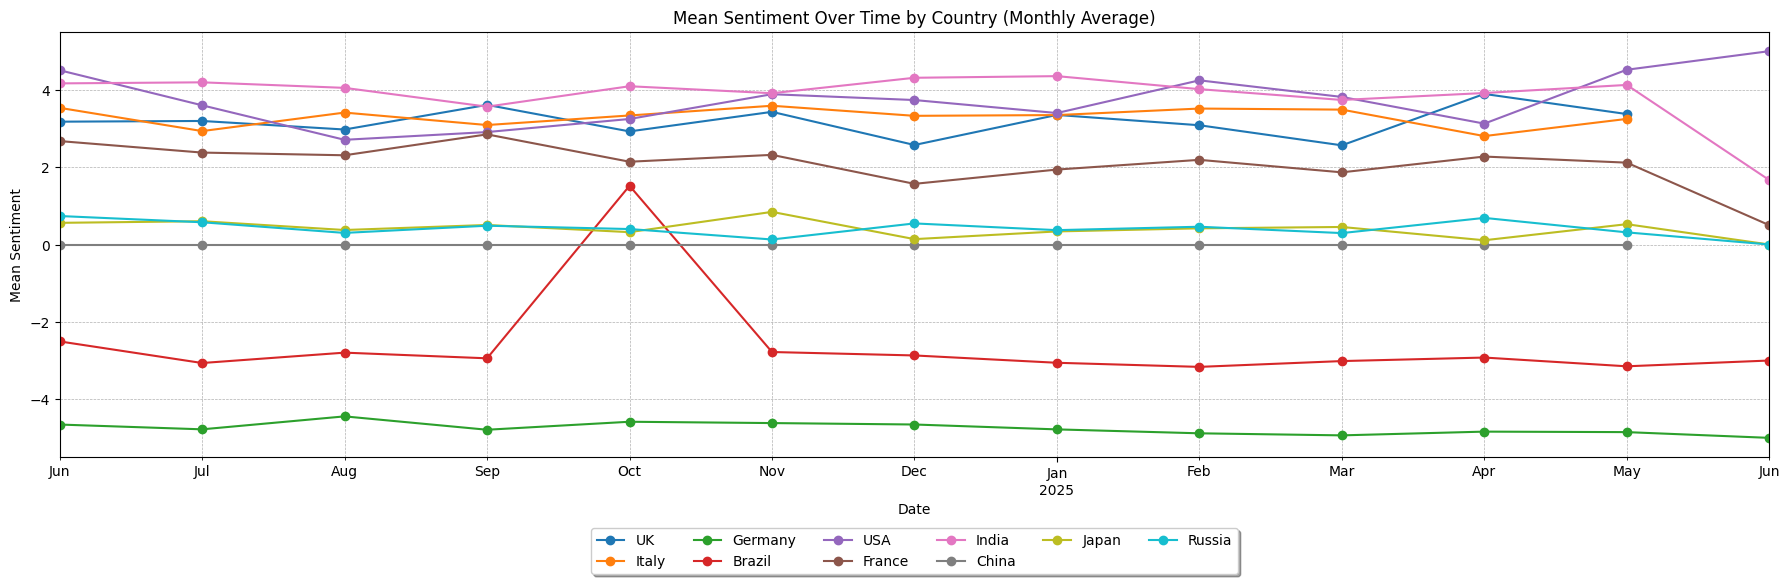

In [ ]:
#Can you modify plot_sentiment_lexicon_over_time_by_country so that the legend is outside the chart? possibly below the chart in the center

def plot_sentiment_lexicon_over_time_by_country(country_dfs, country_names, colors=None):
    """
    Plots the mean sentiment over time for different countries, aggregated by month.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country, with 'publish_date' and 'sentiment_lexicon' columns.
        country_names: A list of strings, the names of the countries.
        colors: A list of colors for each country's line (optional).
    """
    fig, ax = plt.subplots(figsize=(18, 6))

    for i, df in enumerate(country_dfs):
        # Convert 'publish_date' to datetime objects
        df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

        # Convert 'sentiment_lexicon' to numeric, coercing errors to NaN
        df['sentiment_lexicon'] = pd.to_numeric(df['sentiment_lexicon'], errors='coerce')

        # Replace '2025-06-01' with '2025-05-31' in 'publish_date' column
        df['publish_date'] = df['publish_date'].replace(pd.to_datetime('2025-06-01'), pd.to_datetime('2025-05-31'))

        # Drop rows with invalid dates or missing sentiment
        df_cleaned = df.dropna(subset=['publish_date', 'sentiment_lexicon'])

        # Group by month and calculate the mean sentiment
        sentiment_over_time_monthly = df_cleaned.groupby(df_cleaned['publish_date'].dt.to_period('M'))['sentiment_lexicon'].mean()

        # Convert the PeriodIndex to datetime for plotting
        sentiment_over_time_monthly.index = sentiment_over_time_monthly.index.to_timestamp()

        # Plot the monthly mean sentiment for the current country
        color = colors[i] if colors and i < len(colors) else None
        sentiment_over_time_monthly.plot(ax=ax, marker='o', linestyle='-', label=country_names[i], color=color)

    # Add labels, title, and grid
    ax.set_ylabel('Mean Sentiment')
    ax.set_title('Mean Sentiment Over Time by Country (Monthly Average)')
    ax.set_xlabel('Date')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Move the legend outside the plot, below and centered
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(country_names)//2 + 1)


    plt.tight_layout()
    plt.show()

# Example usage with your dataframes:
country_dfs = [
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
]

country_names = ['UK', 'Italy', 'Germany', 'Brazil', 'USA', 'France', 'India', 'China', 'Japan', 'Russia']

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0
    scores = analyzer.polarity_scores(text)
    # Compound ranges from -1 (neg) to +1 (pos)
    compound = scores['compound']
    # Rescale to -5 to +5
    return int(round(compound * 5))

# Apply to dataframe
for df in country_dfs:
  df["sentiment_lexicon"] = df["maintext"].apply(get_sentiment)

plot_sentiment_lexicon_over_time_by_country(country_dfs, country_names)